# EDA Y ETL PARA BASE DE DATOS COMER LOGISTICS: 

## ARCHIVO A TRABAJAR : 2017PurchasePricesDec.csv

In [1]:
pip install pandas numpy matplotlib seaborn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! pip freeze > requirements.txt 

In [3]:
import pandas as pd 

##### CARGA Y LIMPIEZA DE DATOS - Limpiar datos, manejar valores nulos, transformar formatos y preparar los datos para análisis más profundos:

In [4]:
#carga archivo csv
df = pd.read_csv(r'C:\Users\danie\OneDrive\Escritorio\GitProyectoFinal\ComerLogistics\EDA y ETL Dani\2017PurchasePricesDec.csv')

In [5]:
print(df.head())

   Brand                  Description  Price   Size Volume  Classification  \
0     58  Gekkeikan Black & Gold Sake  12.99  750mL    750               1   
1     62     Herradura Silver Tequila  36.99  750mL    750               1   
2     63   Herradura Reposado Tequila  38.99  750mL    750               1   
3     72         No. 3 London Dry Gin  34.99  750mL    750               1   
4     75    Three Olives Tomato Vodka  14.99  750mL    750               1   

   PurchasePrice  VendorNumber                   VendorName  
0           9.28          8320  SHAW ROSS INT L IMP LTD      
1          28.67          1128  BROWN-FORMAN CORP            
2          30.46          1128  BROWN-FORMAN CORP            
3          26.11          9165  ULTRA BEVERAGE COMPANY LLP   
4          10.94          7245  PROXIMO SPIRITS INC.         


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12261 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  object 
 5   Classification  12261 non-null  int64  
 6   PurchasePrice   12261 non-null  float64
 7   VendorNumber    12261 non-null  int64  
 8   VendorName      12261 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 862.2+ KB
None


In [7]:
print(df.describe()) # # Obtener estadísticas descriptivas de las variables numéricas

              Brand         Price  Classification  PurchasePrice  \
count  12261.000000  12261.000000    12261.000000   12261.000000   
mean   17989.067123     38.640240        1.708996      26.488220   
std    12528.503464    206.151172        0.454244     156.182948   
min       58.000000      0.000000        1.000000       0.000000   
25%     5990.000000     10.990000        1.000000       6.890000   
50%    18788.000000     15.990000        2.000000      10.650000   
75%    25117.000000     29.990000        2.000000      20.130000   
max    90631.000000  13999.900000        2.000000   11111.030000   

        VendorNumber  
count   12261.000000  
mean    10814.861757  
std     19007.682322  
min         2.000000  
25%      3960.000000  
50%      7153.000000  
75%      9552.000000  
max    173357.000000  


In [8]:
# Identificar la cantidad de valores nulos en cada columna
print("Valores nulos antes de la limpieza:\n", df.isnull().sum())

Valores nulos antes de la limpieza:
 Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64


### Limpieza de Datos (ETL). Manejo de valores nulos : 

In [9]:
# Limpiar valores nulos
df['Description'] = df['Description'].fillna('Unknown')
df['Size'] = df['Size'].fillna('Unknown')
df['Volume'] = df['Volume'].fillna('Unknown')

In [10]:
# Verificar que no queden valores nulos
print("Valores nulos después de la limpieza:\n", df.isnull().sum())

Valores nulos después de la limpieza:
 Brand             0
Description       0
Price             0
Size              0
Volume            0
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64


###  Análisis de Relaciones entre Variables y Visualización de Distribuciones

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

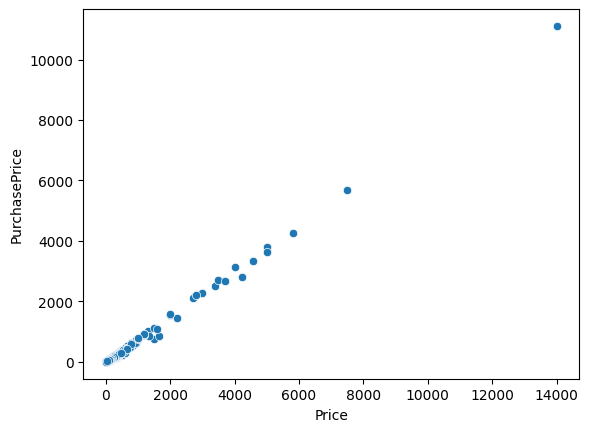

In [12]:
# Relación entre Price y PurchasePrice
sns.scatterplot(data=df, x='Price', y='PurchasePrice')
plt.show()

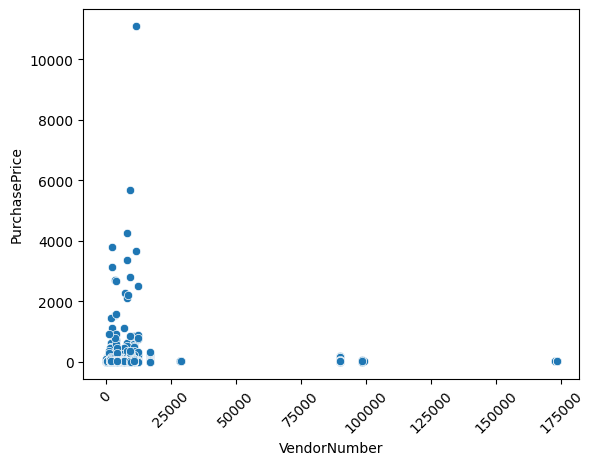

In [13]:
# Relación entre VendorNumber y PurchasePrice
sns.scatterplot(data=df, x='VendorNumber', y='PurchasePrice')
plt.xticks (rotation=45)
plt.show()

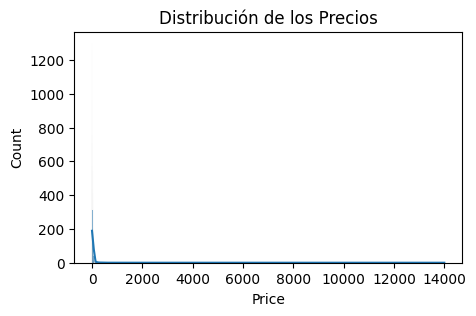

In [16]:
# Distribución de la columna 'Price'
plt.figure(figsize=(5, 3))
sns.histplot(df['Price'], kde=True)
plt.title('Distribución de los Precios')
plt.show()

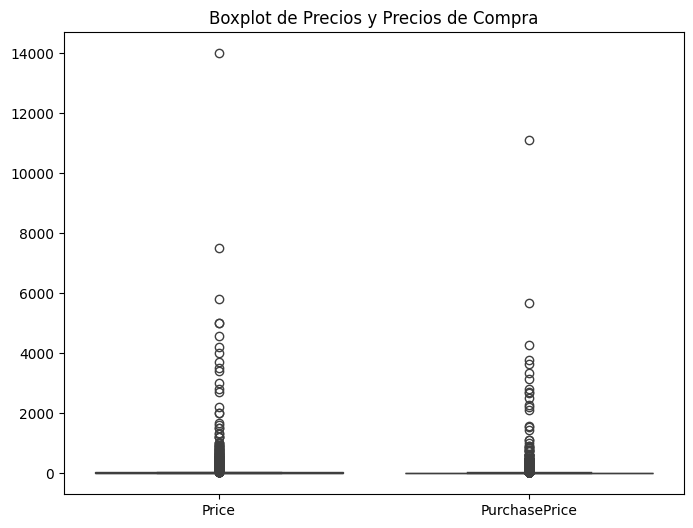

In [17]:
# Boxplot para analizar la dispersión de 'Price' y 'PurchasePrice'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Price', 'PurchasePrice']])
plt.title('Boxplot de Precios y Precios de Compra')
plt.show()

### Transformaciones ETL

In [18]:
# Crear una nueva columna 'ProfitMargin' calculada como la diferencia entre Price y PurchasePrice
df['ProfitMargin'] = df['Price'] - df['PurchasePrice']

In [19]:
# Convertir la columna 'Size' en un número
df['SizeNumeric'] = df['Size'].str.extract(r'(\d+)').astype(float)

#### Guardar el dataset limpio

In [20]:
# Guardar el DataFrame transformado
df.to_csv('purchasePricesDec_new.csv', index=False)

In [21]:
#carga archivo csv
df1 = pd.read_csv(r'C:\Users\danie\OneDrive\Escritorio\GitProyectoFinal\ComerLogistics\EDA y ETL Dani\purchasePricesDec_new.csv')

In [22]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  int64  
 1   Description     12261 non-null  object 
 2   Price           12261 non-null  float64
 3   Size            12261 non-null  object 
 4   Volume          12261 non-null  object 
 5   Classification  12261 non-null  int64  
 6   PurchasePrice   12261 non-null  float64
 7   VendorNumber    12261 non-null  int64  
 8   VendorName      12261 non-null  object 
 9   ProfitMargin    12261 non-null  float64
 10  SizeNumeric     12256 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1.0+ MB
None


----

## ARCHIVO A TRABAJAR : SalesFINAL31122016.csv

## 1 - Configuración del Entorno en Visual Studio Code

 Instalación de las librerías necesarias

In [2]:
! pip install pandas numpy matplotlib seaborn sqlalchemy pyodbc


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
! pip freeze > requirements.txt

## 2 - Carga y Limpieza de los Datos (ETL) 

Carga del archivo CSV en un Dataframe de Pandas:

In [4]:
import pandas as pd

# Carga del archivo CSV
df = pd.read_csv(r'C:\Users\mlope\OneDrive\Escritorio\PROYECTO FINAL\DataBase_PF\SalesFINAL12312016.csv')

Inspección de datos:

In [5]:
print(df.head())  # Muestra las primeras filas

           InventoryId  Store  Brand                 Description        Size  \
0  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
1  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
2  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
3  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
4  1_HARDERSFIELD_1005      1   1005     Maker's Mark Combo Pack  375mL 2 Pk   

   SalesQuantity  SalesDollars  SalesPrice SalesDate  Volume  Classification  \
0              1         16.49       16.49  1/1/2016     750               1   
1              2         32.98       16.49  1/2/2016     750               1   
2              1         16.49       16.49  1/3/2016     750               1   
3              1         14.49       14.49  1/8/2016     750               1   
4              2         69.98       34.99  1/9/2016     375               1   

   ExciseTax  VendorNo                

Creación de Archivo Requirements:

In [6]:
! pip freeze > requirements.txt

## 2 - Carga y Limpieza de los Datos (ETL) 

Carga del archivo CSV en un Dataframe de Pandas:

In [7]:
import pandas as pd

# Carga del archivo CSV
df = pd.read_csv(r'C:\Users\mlope\OneDrive\Escritorio\PROYECTO FINAL\DataBase_PF\SalesFINAL12312016.csv')

Inspección de datos:

In [8]:
print(df.head())  # Muestra las primeras filas

           InventoryId  Store  Brand                 Description        Size  \
0  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
1  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
2  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
3  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
4  1_HARDERSFIELD_1005      1   1005     Maker's Mark Combo Pack  375mL 2 Pk   

   SalesQuantity  SalesDollars  SalesPrice SalesDate  Volume  Classification  \
0              1         16.49       16.49  1/1/2016     750               1   
1              2         32.98       16.49  1/2/2016     750               1   
2              1         16.49       16.49  1/3/2016     750               1   
3              1         14.49       14.49  1/8/2016     750               1   
4              2         69.98       34.99  1/9/2016     375               1   

   ExciseTax  VendorNo                

In [9]:
print(df.info())  # Información de columnas y tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   InventoryId     1048575 non-null  object 
 1   Store           1048575 non-null  int64  
 2   Brand           1048575 non-null  int64  
 3   Description     1048575 non-null  object 
 4   Size            1048575 non-null  object 
 5   SalesQuantity   1048575 non-null  int64  
 6   SalesDollars    1048575 non-null  float64
 7   SalesPrice      1048575 non-null  float64
 8   SalesDate       1048575 non-null  object 
 9   Volume          1048575 non-null  int64  
 10  Classification  1048575 non-null  int64  
 11  ExciseTax       1048575 non-null  float64
 12  VendorNo        1048575 non-null  int64  
 13  VendorName      1048575 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 112.0+ MB
None


In [10]:
print(df.describe())  # Estadísticas descriptivas

              Store         Brand  SalesQuantity  SalesDollars    SalesPrice  \
count  1.048575e+06  1.048575e+06   1.048575e+06  1.048575e+06  1.048575e+06   
mean   4.008063e+01  1.216959e+04   2.337619e+00  3.160420e+01  1.543162e+01   
std    2.435739e+01  1.241921e+04   3.511492e+00  6.570249e+01  1.404967e+01   
min    1.000000e+00  5.800000e+01   1.000000e+00  4.900000e-01  4.900000e-01   
25%    1.500000e+01  3.680000e+03   1.000000e+00  1.099000e+01  8.990000e+00   
50%    3.900000e+01  6.296000e+03   1.000000e+00  1.799000e+01  1.299000e+01   
75%    6.400000e+01  1.795400e+04   2.000000e+00  3.199000e+01  1.899000e+01   
max    7.900000e+01  9.008900e+04   4.320000e+02  1.327997e+04  4.999990e+03   

             Volume  Classification     ExciseTax      VendorNo  
count  1.048575e+06    1.048575e+06  1.048575e+06  1.048575e+06  
mean   9.500280e+02    1.416550e+00  1.326847e+00  6.995043e+03  
std    7.142708e+02    4.929872e-01  3.407898e+00  8.426736e+03  
min    5.000000

Visualización del tamaño del Dataframe (Filas y Columnas):

In [11]:
import numpy as np

In [12]:
np.shape(df)

(1048575, 14)

# Limpieza de Datos:

1 - Conversión del tipo de datos:

In [13]:
df['SalesDate'] = pd.to_datetime(df['SalesDate'], format='%m/%d/%Y')
df['SalesQuantity'] = pd.to_numeric(df['SalesQuantity'], errors='coerce')
df['SalesDollars'] = pd.to_numeric(df['SalesDollars'], errors='coerce')
df['SalesPrice'] = pd.to_numeric(df['SalesPrice'], errors='coerce')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
df['ExciseTax'] = pd.to_numeric(df['ExciseTax'], errors='coerce')

2 - Busqueda de Nulos:

In [14]:
df.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
dtype: int64

No se encontraron nulos

3 - Búsqueda de Duplicados:

In [15]:
duplicados = df[df.duplicated()]

print(duplicados)

Empty DataFrame
Columns: [InventoryId, Store, Brand, Description, Size, SalesQuantity, SalesDollars, SalesPrice, SalesDate, Volume, Classification, ExciseTax, VendorNo, VendorName]
Index: []


No se encontraron duplicados

## Paso 3: Análisis Exploratorio de Datos (EDA)

1 - Análisis básico:

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

Gráfico de Distribución de Ventas por Precio de Producto:

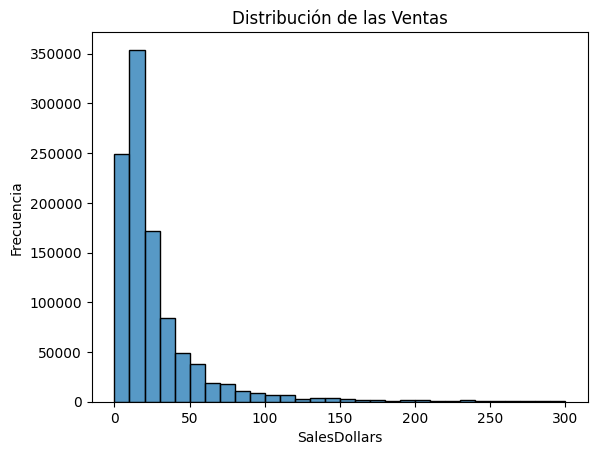

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['SalesDollars'], binwidth=10, binrange=(0, 300))  # Ajusta los valores según tus datos
plt.title('Distribución de las Ventas')
plt.xlabel('SalesDollars')
plt.ylabel('Frecuencia')
plt.show()

Relación entre SalesPrice y SalesQuantity:

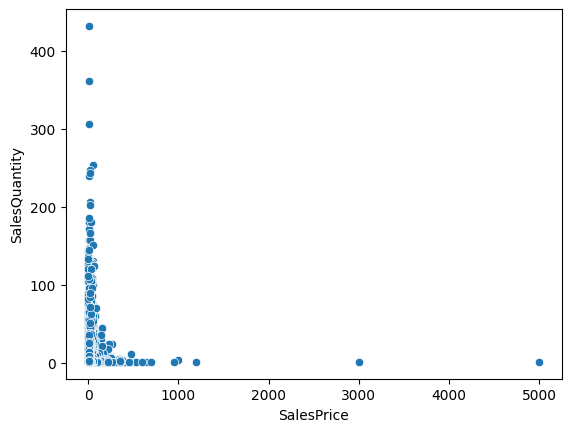

In [18]:
# Relación entre SalesPrice y SalesQuantity
sns.scatterplot(data=df, x='SalesPrice', y='SalesQuantity')
plt.show()

Datos Estadísticos Básicos:

In [19]:
def calcular_estadisticas(data): 
    for columna in data.columns:
        if data[columna].dtype == 'float64' or data[columna].dtype == 'int64':
            print(columna)
            print('Mediana:', data[columna].median())
            print('Varianza: ', np.around((data[columna].var()),decimals=2)) # Casteo (redondeo) a 2 decimales
            print('Rango:', data[columna].max() - data[columna].min())
            print('Moda:', data[columna].mode()[0])
            print('--------------------------------')

calcular_estadisticas(df)

Store
Mediana: 39.0
Varianza:  593.28
Rango: 78
Moda: 15
--------------------------------
Brand
Mediana: 6296.0
Varianza:  154236867.07
Rango: 90031
Moda: 3606
--------------------------------
SalesQuantity
Mediana: 1.0
Varianza:  12.33
Rango: 431
Moda: 1
--------------------------------
SalesDollars
Mediana: 17.99
Varianza:  4316.82
Rango: 13279.48
Moda: 9.99
--------------------------------
SalesPrice
Mediana: 12.99
Varianza:  197.39
Rango: 4999.5
Moda: 9.99
--------------------------------
Volume
Mediana: 750.0
Varianza:  510182.74
Rango: 19950
Moda: 750
--------------------------------
Classification
Mediana: 1.0
Varianza:  0.24
Rango: 1
Moda: 1
--------------------------------
ExciseTax
Mediana: 0.68
Varianza:  11.61
Rango: 378.51
Moda: 0.79
--------------------------------
VendorNo
Mediana: 4425.0
Varianza:  71009874.8
Rango: 173355
Moda: 3960
--------------------------------


Guardado del Dataframe en un archivo .CSV:

In [20]:
# Guardar el DataFrame transformado
df.to_csv('SalesFINAL31122016_Limpio.csv', index=False)

In [21]:
#carga archivo csv
df2 = pd.read_csv(r'C:\Users\mlope\OneDrive\Escritorio\ProyectoFinalSoyHenry\ComerLogistics\Sprint_1\EDA y ETL\SalesFINAL31122016_Limpio.csv')

Información de Columnas y Tipos de Datos:

In [22]:
print(df2.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   InventoryId     1048575 non-null  object 
 1   Store           1048575 non-null  int64  
 2   Brand           1048575 non-null  int64  
 3   Description     1048575 non-null  object 
 4   Size            1048575 non-null  object 
 5   SalesQuantity   1048575 non-null  int64  
 6   SalesDollars    1048575 non-null  float64
 7   SalesPrice      1048575 non-null  float64
 8   SalesDate       1048575 non-null  object 
 9   Volume          1048575 non-null  int64  
 10  Classification  1048575 non-null  int64  
 11  ExciseTax       1048575 non-null  float64
 12  VendorNo        1048575 non-null  int64  
 13  VendorName      1048575 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 112.0+ MB
None


--------------------

## ARCHIVO A TRABAJAR : .csv